<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/MN2021_2_EDO_ivp01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada (EDO ivp)

**Nombre:** 

Jaime A. Valencia

Esteban Velilla

**Email:**

jalejandro.valencia@udea.edu.co

esteban.velilla@udea.edu.co

**Curso:**
Métodos numéricos

**Fecha:**
Domingo 12 de diciembre del 2021


# Descripcion

Ejemplo de solucion numerica de una ecuacion diferencial con condiciones iniciales.

Caso de la respuesta dinamica del pendulo. Ejemplo tomados del caitulo 5 del texto de [Burden y Faires](https://fac.ksu.edu.sa/sites/default/files/numerical_analysis_9th.pdf).

[Imagen del ejemplo.](https://drive.google.com/file/d/1E45OEMkOQEMSnX2X7y6cdbEDM3wlJyBl/view?usp=sharing)

Uso de odeint() del modulo scipy.

Documento sobre el **[pendulo](http://verso.mat.uam.es/~pablo.angulo/edpan/solucion.entrega1.pdf)**




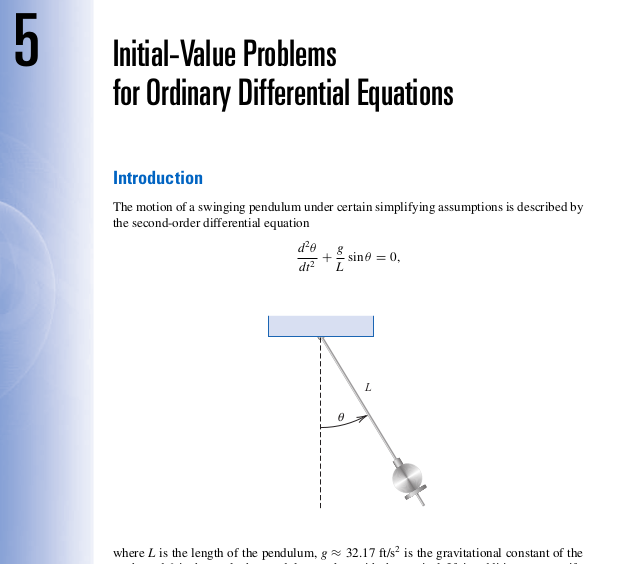

# Programacion Funcion

Cable tendido


$ \frac{d^{2} \theta}{dt^{2}} +  \frac{g}{L} sin(\theta) = 0 $

$\theta(0)= \frac{\pi}{2}$

$d\theta(0) = 0$

Cambio de variables para transformar la ED de orden 2 en una ED vectorial de orden 1.

$ \overline u = \begin{bmatrix}u_{0}, & u_{1} \ \end{bmatrix}=\begin{bmatrix}\theta, & \theta' \ \end{bmatrix} $

$ \frac{d}{dt}  \overline u = \begin{bmatrix}\theta', & \theta'' \ \end{bmatrix} = \begin{bmatrix}u_{1}, & -\frac{g}{L} sin(u_{0})\ \end{bmatrix}$




In [ ]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, solve_ivp

def Pendulo01(t,Z, L=1.0, g=32.17, Ka=0.001):
    """Z: [teta, d_teta] funcion vectorial dependiente de t
       Z[0] = teta (angulo del pendulo)
       Z[1] = d_teta (velocidad angular del pendulo)  
       t: variable independiente
       L: longitude del pendulo
       g: aceleracion de la gravedad
       ka: constante de amortiguacion

       
    """
    zo,z1 = Z
    
    D_z0 = z1
    D_z1 = - Ka*z1 - (g/L)*np.sin(zo)
    Dz = np.array([D_z0, D_z1])

    return Dz


# Modulo y funciones de solucion



Importacion de los modulos para la solucion numerica de ecuaciones diferenciales ordinarias y se programacion las funciones requeridas.

[odeint](https:/https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html/)

[solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

[Doc Comparacion metodos ](https://danielmuellerkomorowska.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/)

# Solucion de la ED

In [ ]:

#edicion de condiciones iniciales
Z0_o = np.pi/2
Z1_o = 0.
Zo = [Z0_o, Z1_o]

print('Condiciones inicial : [Angulo, Velocidad]', Zo)


##definir rango de solucion
t_inicial = 0
t_final= 5.0
sample = 100
T = np.linspace(t_inicial, t_final, sample)
t_span = (t_inicial, t_final)

print('Solucion entre ',t_inicial,' y ',t_final, 'segundos')


# Solucionar la EDO

Sol = odeint(Pendulo01, Zo, T, tfirst=True)#'LSODA'
S_ivp = solve_ivp(Pendulo01, t_span, Zo, method="RK45")
#METHODS = {'RK23','RK45', 'DOP853', 'Radau', 'BDF', 'LSODA'}

print("Solucion odeint",Sol.shape)
print("Solucion solve_ivp", S_ivp.y.shape)

Condiciones inicial : [Angulo, Velocidad] [1.5707963267948966, 0.0]
Solucion entre  0  y  5.0 segundos
Solucion odeint (100, 2)
Solucion solve_ivp (2, 30)


# Grafico de la respuesta

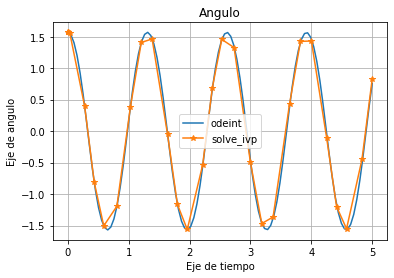

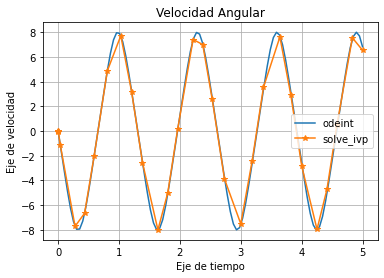

In [ ]:
#Imprimir y graficar resultados usando Matplotlib
Ang_t = Sol[:,0]
Vel_t = Sol[:,1]

t_sivp = S_ivp.t
Ang_sivp = S_ivp.y[0]
Vel_sivp = S_ivp.y[1]

plt.figure(1)
plt.plot(T, Ang_t, t_sivp, Ang_sivp,"*-")
plt.title('Angulo')
plt.xlabel('Eje de tiempo')
plt.ylabel('Eje de angulo')
plt.legend(["odeint","solve_ivp"])
plt.grid(True)

plt.figure(2)
plt.plot(T, Vel_t, t_sivp, Vel_sivp,"*-")
plt.title('Velocidad Angular')
plt.xlabel('Eje de tiempo')
plt.ylabel('Eje de velocidad')
plt.grid(True)
plt.legend(["odeint","solve_ivp"])

plt.show()

# Graficos de fase

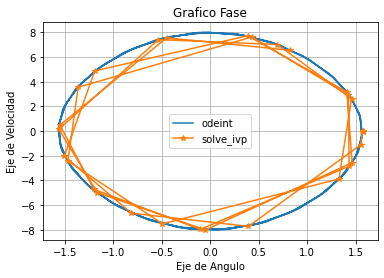

In [ ]:
# grafico de fase

plt.figure(1)
plt.plot(Ang_t, Vel_t, Ang_sivp, Vel_sivp,"*-")
plt.title('Grafico Fase')
plt.xlabel('Eje de Angulo')
plt.ylabel('Eje de Velocidad')
plt.legend(["odeint","solve_ivp"])
plt.grid(True)

plt.show()



# Resultados y conclusiones

**Resultados y analisis:**


**Conclusiones:**


**Referencias:**

[Odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

[solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

[Doc Comparacion metodos ](https://danielmuellerkomorowska.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/)

[Burden&Faires 9ed](https://fac.ksu.edu.sa/sites/default/files/numerical_analysis_9th.pdf)

